# Adam Optimizer

Run each cell in the notebook. The explanation of the cells are given on top respectively. You would require keras with tensorflow backend.

In [39]:
import numpy as np
import random
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from keras_team.keras.datasets import mnist

Downloading the Mnist data

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Scaling the data so that values are between 0 and 1

In [41]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train = x_train/255
x_test = x_test/255

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Creating the training and testing dataset alongwith setting the Y values to 0 or 1 depending on a condition. The condition here is last digit of VUNetId. My last digit is 1. So for the Y values of 1, new value is set to 1(true). Rest of them are set to 0(false). Also the 28x28 dataset is converted to a column vector 784x1.

In [42]:
X = x_train.reshape(60000, 784)  #Converting to column vector for each datapoint
X1 = X.copy()
Y = np.array(y_train == 1)
Y = 1*Y    #Setting values to 1 or 0 for training
Y = Y.reshape(60000, 1)
print(X.shape,Y.shape)

test_X = x_test.reshape(10000,784)
test_X = test_X.transpose()
test_Y = np.array(y_test == 1)
test_Y = 1*test_Y         # Setting values to 1 or 0 for test


(60000, 784) (60000, 1)


In [43]:
total_data = np.concatenate((Y, X), axis = 1)
print(total_data.shape)


(60000, 785)


This is the forward propagation step of the hidden layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a ReLU function

In [44]:
def forward_prop_hidden(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = relu(Z)
    return A, Z

This is the forward propagation step of the output layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a sigmoid function to make the value between 0 - 1

In [45]:
def forward_prop_output(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = sigmoid(Z)
    return A


This is the backward propagation step. Here the required derivatives are calculated which will be later updated in further steps.

In [46]:
def backward_prop_1(A1, m, W2, dZ2, Z1, data_X):
    dZ1 = np.dot(W2.T, dZ2) 
    dZ1 = dZ1* relu_derivative(Z1)
    dW1 = np.dot(dZ1, data_X.T)/m
    db1 = np.sum(dZ1, axis =1)/m
    db1 = db1.reshape(-1, 1)
    return dW1, db1, dZ1

This is the backward propagation of output layer(Layer2)

In [47]:
def backward_prop_2(A2, A1, m, data_Y):
    dZ2 = A2 - data_Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis =1)/m
    db2 = db2.reshape(-1, 1)
    return dW2, db2, dZ2

This is the sigmoid activation function used to map any real value between 0 and 1

In [48]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


This is the Rectified Linear Unit(ReLU) activation function

In [49]:
def relu(x):
    return np.maximum(0,x)

This is the derivative of the ReLU function

In [50]:
def relu_derivative(x):
    y = np.array(x > 0)
    y = 1*y
    return y

Computes the cost function for all the training samples

In [51]:
def cost_function(A, m, data_Y):
    total_cost = -(1 / m) * np.sum(data_Y * np.log(A) + (1 - data_Y) * np.log(1 - A))
    return total_cost

Here the results are predicted. The W and b of model are taken as input. The values are predicted using test dataset and then using the actual values the accuracy is computed

In [52]:
def results(W, b, data_X, data_Y):
    A1 = data_X
    for k in range(l-2):
        A1, Z1 = forward_prop_hidden(W[k], b[k], A1)        
    A2 =  forward_prop_output(W[l-2], b[l-2], A1)   
    pred_Y = A2.transpose()
    
    pred_Y = np.around(pred_Y, decimals = 0)   #Rounding off the predicted value to 0 or 1    
    accuracy = accuracy_score(data_Y.T, pred_Y)   
    return accuracy

Plotting the cost function as a function of the iterations. In general we can see that the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our neural network is converging hence the error is reducing asymptotically.

In [53]:
def cost_graph(J_arr, cost_arr):
    plt.title('Cost Function Graph')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.plot(J_arr, cost_arr)
    plt.show()

Here we construct the layout of our neural network. The h array contains the number of hidden units in each layer and the value l indicates the total no of layers.

In [54]:
h = [784, 20, 10, 1]     #hidden units
l = 4               #total no of layers

This is the adam optimizer. We have hyperparameters of learning rate, beta1, beta2 and we print the training and testing accuracy. After that we plot the cost function on basis of number of iterations. We have set the number of batches to 60000/batch size.

C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Bikram Kumar De\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Beta1: 0.9 Beta2: 0.999
Training error: 0.0 %
Test error: 0.29999999999999716 %


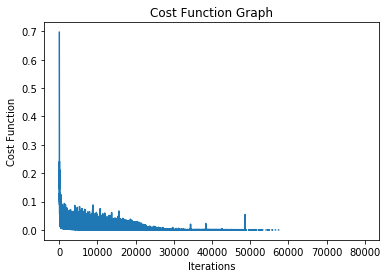

Beta1: 0.9 Beta2: 0.6
Training error: 1.171875 %
Test error: 0.9000000000000057 %


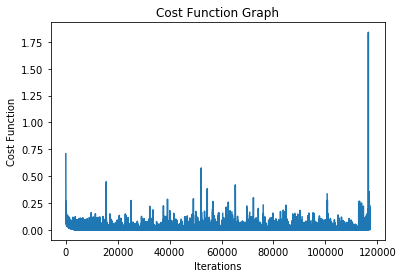

Beta1: 0.9 Beta2: 0.01
Training error: 10.546875 %
Test error: 11.350000000000009 %


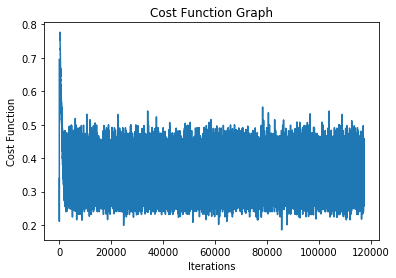

Beta1: 0.5 Beta2: 0.999
Training error: 0.0 %
Test error: 0.28000000000000114 %


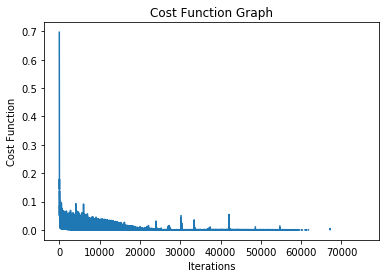

Beta1: 0.5 Beta2: 0.6
Training error: 0.0 %
Test error: 0.37999999999999545 %


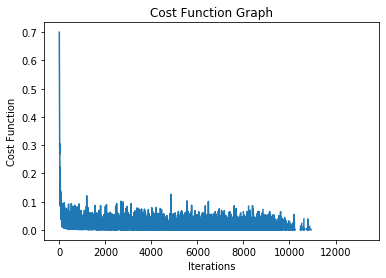

Beta1: 0.5 Beta2: 0.01
Training error: 0.0 %
Test error: 0.5499999999999972 %


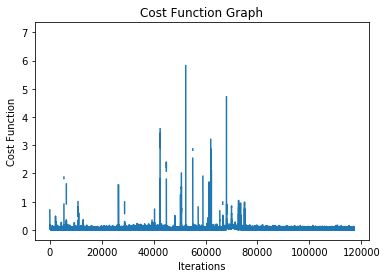

Beta1: 0.1 Beta2: 0.999
Training error: 0.0 %
Test error: 0.3399999999999892 %


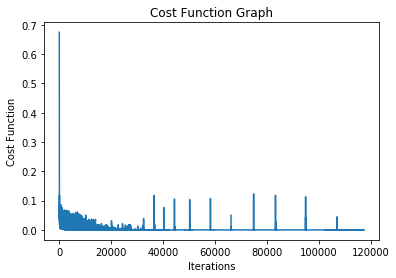

Beta1: 0.1 Beta2: 0.6
Training error: 0.0 %
Test error: 0.37999999999999545 %


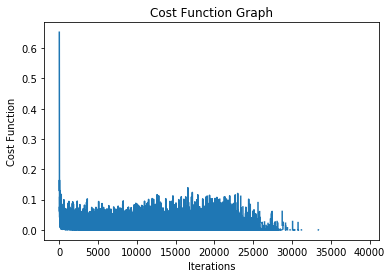

Beta1: 0.1 Beta2: 0.01
Training error: 0.390625 %
Test error: 0.4299999999999926 %


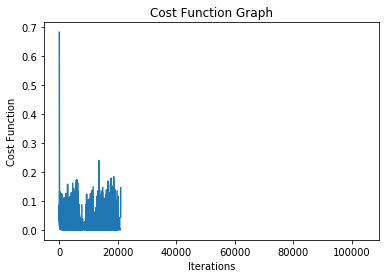

In [55]:
def adam():
    alpha = 0.001
    beta1_arr = [0.9, 0.5, 0.1]
    beta2_arr = [0.999, 0.6, 0.01]
    delta = 0.00000001
    W = [None]*(l-1)
    b = [None]*(l-1)
    VdW = [None]*(l-1)
    Vdb = [None]*(l-1)
    SdW = [None]*(l-1)
    Sdb = [None]*(l-1)
    v_dW = [None]*(l-1)
    v_db = [None]*(l-1)
    s_dW = [None]*(l-1)
    s_db = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    cost_array = []
    J_arr =[]
    epochs = 501
    count = 0
    for beta1 in beta1_arr:
        for beta2 in beta2_arr:
            cost_array = []
            J_arr =[]
            count = 0
            for k in range(l-1):
                W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing parameters
                b[k] = np.random.rand(h[k+1], 1)*0.0
                VdW[k] = np.random.rand(h[k+1],h[k])*0.0
                Vdb[k] = np.random.rand(h[k+1], 1)*0.0
                SdW[k] = np.random.rand(h[k+1],h[k])*0.0
                Sdb[k] = np.random.rand(h[k+1], 1)*0.0
                v_dW[k] = np.random.rand(h[k+1],h[k])*0.0
                v_db[k] = np.random.rand(h[k+1], 1)*0.0
                s_dW[k] = np.random.rand(h[k+1],h[k])*0.0
                s_db[k] = np.random.rand(h[k+1], 1)*0.0
            for epoch in range(epochs):
#                 if(epoch%100 == 0):
#                     print('Epoch:', epoch)
                np.random.shuffle(total_data)
                split_data = np.array_split(total_data, (60000/256))   #set the number of batches
                minibatch_count = 0
                t = 0
                for minibatch in split_data:
#                     if (epoch%50 == 0 and minibatch_count %200 ==0):
#                         print('Batch Count:', minibatch_count)
                    minibatch_count += 1
                    X = np.array(minibatch[:,1:])
                    Y = np.array(minibatch[:,0])        #selecting data and truth values of minibatches
                    train_X = X.T
                    train_Y = Y.T
                    n, m = train_X.shape
                    A[0] = train_X
                    for k in range(l-2):
                        A[k+1], Z[k+1] = forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
                    A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

                    (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
                    for k in reversed(range(l-2)):
                        (dW[k], db[k], dZ[k]) = backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer
                    t = t+1
                    for k in range(l-1):
                        VdW[k] = beta1*VdW[k] + (1-beta1)*dW[k]   #Using velocity and momentum
                        Vdb[k] = beta1*Vdb[k] + (1-beta1)*db[k]
                        SdW[k] = beta2*SdW[k] + (1-beta2)*dW[k]*dW[k]
                        Sdb[k] = beta2*Sdb[k] + (1-beta2)*db[k]*db[k]
                        v_dW[k] = VdW[k]/(1-(beta1**t))
                        v_db[k] = Vdb[k]/(1-(beta1**t))
                        s_dW[k] = SdW[k]/(1-(beta2**t))
                        s_db[k] = Sdb[k]/(1-(beta2**t))
                        W[k] = W[k] - alpha*v_dW[k]/(np.sqrt(s_dW[k])+delta)
                        b[k] = b[k] - alpha*v_db[k]/(np.sqrt(s_db[k])+delta)       #Updating b and W

                    total_cost = cost_function(A[l-1], m, train_Y)
                    cost_array.append(total_cost)    # Storing the value of cost function
                    J_arr.append(count)
                    count+= 1

            final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
            final_accuracy_train = results(W, b, train_X, train_Y)*100
            print('Beta1:', beta1, 'Beta2:', beta2)
            print('Training error:', str(100-final_accuracy_train),'%')
            print('Test error:', str(100-final_accuracy_test),'%')
            cost_graph(J_arr, cost_array)
adam()

I have taken 9 different combinations of beta1 and beta2 hyperparameters and analyzed the results. The cost function for each of the cases has already been plotted. The accuracies are :




Case 1:
Beta1: 0.9 Beta2: 0.999
Training error: 0.0 %
Test error: 0.29999999999999716 %


Case 2: Beta1: 0.9 Beta2: 0.6
Training error: 1.171875 %
Test error: 0.9000000000000057 %

Case 3: Beta1: 0.9 Beta2: 0.01
Training error: 10.546875 %
Test error: 11.350000000000009 %

Case 4:
Beta1: 0.5 Beta2: 0.999
Training error: 0.0 %
Test error: 0.28000000000000114 %

Case 5:
Beta1: 0.5 Beta2: 0.6
Training error: 0.0 %
Test error: 0.37999999999999545 %

Case 6:
Beta1: 0.5 Beta2: 0.01
Training error: 0.0 %
Test error: 0.5499999999999972 %

Case 7:
Beta1: 0.1 Beta2: 0.999
Training error: 0.0 %
Test error: 0.3399999999999892 %

Case 8:
Beta1: 0.1 Beta2: 0.6
Training error: 0.0 %
Test error: 0.37999999999999545 %

Case 9:
Beta1: 0.1 Beta2: 0.01
Training error: 0.390625 %
Test error: 0.4299999999999926 %

In general there is a bit of overfitting. It gives 100 % accuracy on training data in some cases. The best scenario is having a high value of beta1 and beta2 both. The worst case scenario is observed when beta1 is high and beta2 is extremely low. At that point the accuracy drops to almost 90%. The major change that is observed on changing the hyperparameters is how fast the cost function converges. This can be seen in the cost graphs. Otherwise the accuracy is greater than 99% in most cases.